In [1]:
'''
Description:-
This is a project on sentiment analysis on chat dataset
The dataset is available in this link: https://www.kaggle.com/datasets/nursyahrina/chat-sentiment-dataset
I have used NLP and classification based ML models to deal with the analysis

Date:- 24.07.2024
'''

'\nDescription:-\nThis is a project on sentiment analysis on chat dataset\nThe dataset is available in this link: https://www.kaggle.com/datasets/nursyahrina/chat-sentiment-dataset\nI have used NLP and classification based ML models to deal with the analysis\n\nDate:- 24.07.2024\n'

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [3]:
# Download required NLTK data files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# Load the data
data = pd.read_csv(r"chat_dataset.csv")
data.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [5]:
#Checking for null values and count numbers of positive, negative and neutral sentiments
print(data.isnull().sum())
data['sentiment'].value_counts()

message      0
sentiment    0
dtype: int64


neutral     259
positive    178
negative    147
Name: sentiment, dtype: int64

In [6]:
# Data Preprocessing
#i)Cleaning text
def clean_text(text):
    """
    Cleans the input text by removing noise and normalizing the text.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

In [7]:
#ii)Preprocessing text
def preprocess_text(text):
    """
    Tokenizes the text, removes stopwords, and lemmatizes the words.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [8]:
# Apply cleaning and preprocessing
data['cleaned_text'] = data['message'].apply(clean_text)
data['processed_text'] = data['cleaned_text'].apply(preprocess_text)

Positive words


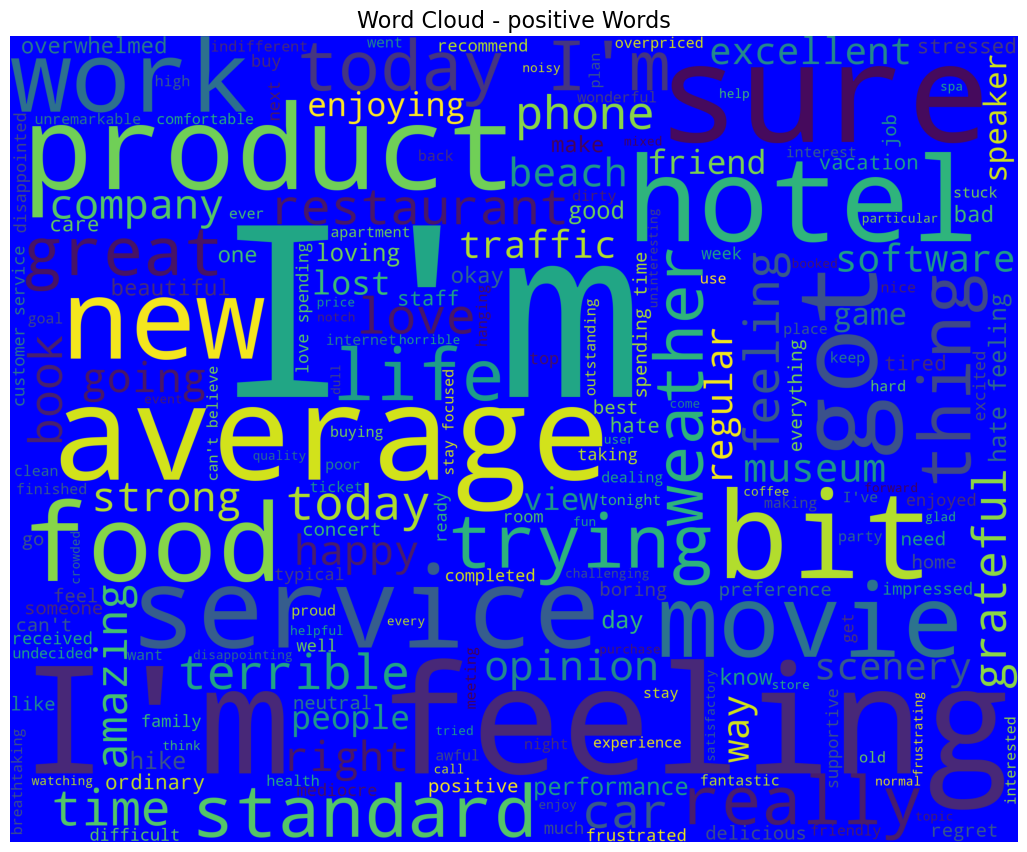

Negative words


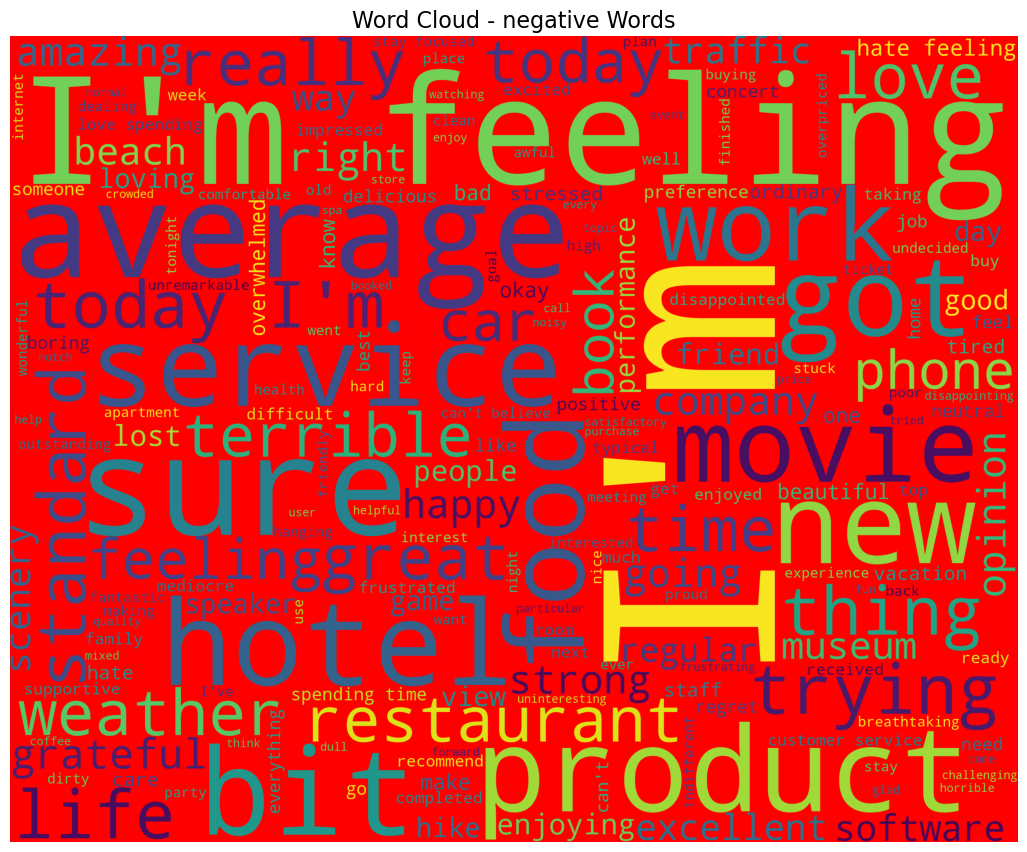

Neutral words


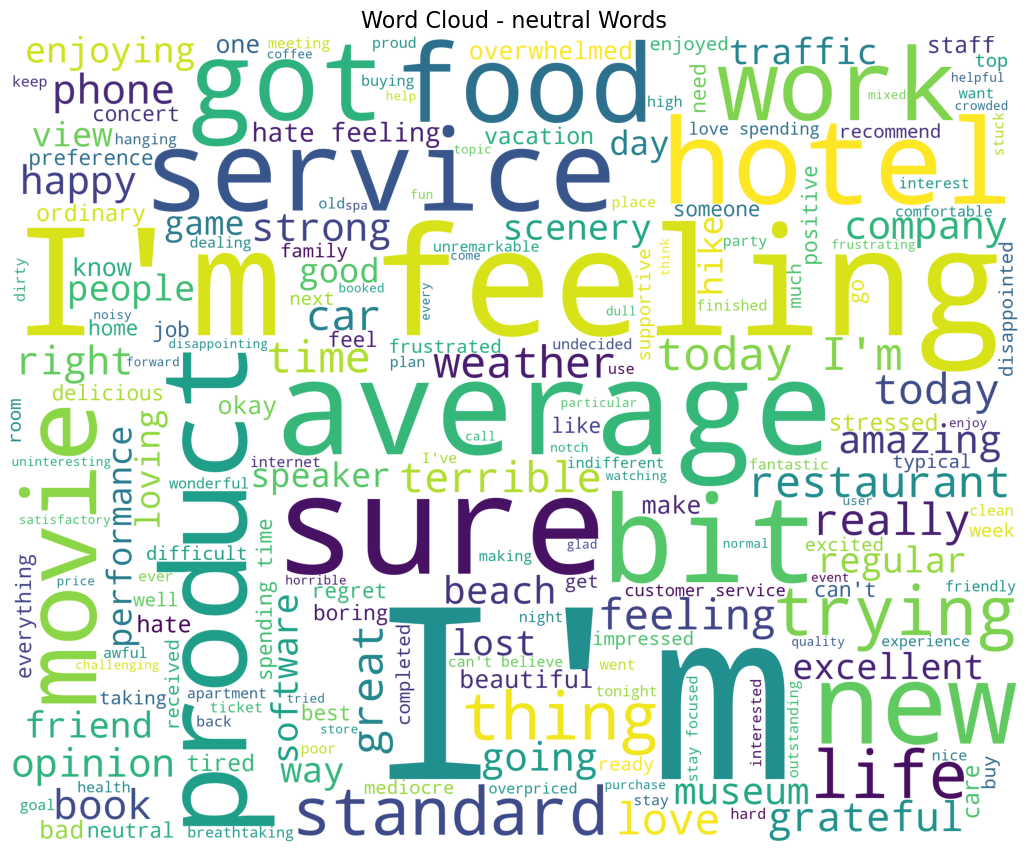

In [9]:
#Wordcloud generation
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Import for word cloud generation
pos = data[data['processed_text'] == 'positive']
pos = data['message']
neu = data[data['processed_text'] == 'neutral']
neu = data['message']
neg = data[data['processed_text'] == 'negative']
neg = data['message']
def wordcloud_draw(data, color='black'):
    """
    Generates and displays a word cloud visualization of text data.
    """
    words = ' '.join(data)  # Combine elements in data with spaces

    stop_words = set(stopwords.words('english'))
    # Create the word cloud object with desired parameters
    wordcloud = WordCloud(stopwords=stop_words,
                          background_color=color,
                          width=2500,
                          height=2000).generate(words)

    # Generate the plot
    plt.figure(figsize=(13, 13))  # Set figure size
    plt.imshow(wordcloud)
    plt.axis('off')  # Hide axis labels
    plt.title(f"Word Cloud - {'positive' if color == 'blue' else('negative' if color=='red' else 'neutral')} Words", fontsize=16)  # Add title based on color
    plt.show()


# Assuming pos,neg and neu are available (lists containing positive,negative and neutral text data)
print("Positive words")
wordcloud_draw(pos, 'blue')

print("Negative words")
wordcloud_draw(neg, 'red')

print("Neutral words")
wordcloud_draw(neu, 'white')

In [10]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])

In [11]:
# Prepare the target variable
y = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

In [12]:
# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf,y_train,y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [13]:
# Model Training
# 1. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [14]:
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}\n")

Naive Bayes Classifier:
              precision    recall  f1-score   support

          -1       1.00      0.33      0.50        30
           0       0.67      0.98      0.80        54
           1       0.86      0.73      0.79        33

    accuracy                           0.74       117
   macro avg       0.84      0.68      0.69       117
weighted avg       0.81      0.74      0.72       117

Accuracy: 0.7435897435897436



In [15]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

In [16]:
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")

Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.86      0.63      0.73        30
           0       0.84      0.91      0.88        54
           1       0.78      0.88      0.83        33

    accuracy                           0.83       117
   macro avg       0.83      0.81      0.81       117
weighted avg       0.83      0.83      0.82       117

Accuracy: 0.8290598290598291



In [17]:
# 3. Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [18]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}\n")

Logistic Regression:
              precision    recall  f1-score   support

          -1       1.00      0.53      0.70        30
           0       0.74      0.96      0.84        54
           1       0.84      0.79      0.81        33

    accuracy                           0.80       117
   macro avg       0.86      0.76      0.78       117
weighted avg       0.84      0.80      0.79       117

Accuracy: 0.8034188034188035



In [19]:
# Logistic Regression with Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,20],'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'penalty' : ['l1', 'l2', 'elasticnet', None],'l1_ratio':[0.1,0]}
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

c:\users\pius\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\pius\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\pius\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\pius\appdata\local\programs\python\python38\lib\site-packages\skle

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20], 'l1_ratio': [0.1, 0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [20]:
# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Best parameters: {'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8034188034188035
              precision    recall  f1-score   support

          -1       0.79      0.63      0.70        30
           0       0.80      0.91      0.85        54
           1       0.81      0.79      0.80        33

    accuracy                           0.80       117
   macro avg       0.80      0.78      0.79       117
weighted avg       0.80      0.80      0.80       117



In [21]:
# SVM with Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.9,1,1.2,1.1],'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,4]}
grid_search = GridSearchCV(SVC(max_iter = 1000), param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.9, 1, 1.2, 1.1], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Best parameters: {'C': 1, 'degree': 2, 'kernel': 'sigmoid'}
Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

          -1       0.91      0.67      0.77        30
           0       0.85      0.93      0.88        54
           1       0.81      0.88      0.84        33

    accuracy                           0.85       117
   macro avg       0.85      0.82      0.83       117
weighted avg       0.85      0.85      0.84       117



In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Accuracy: 0.8461538461538461



###### We go with Support Vector Classifier model since it is giving best accuracy out of all classification based models trained i.e. Logistic Regression and Multinomial Naive Bayes

Confusion Matrix:
[[141   2   2]
 [  5 108   4]
 [  2   2 201]]


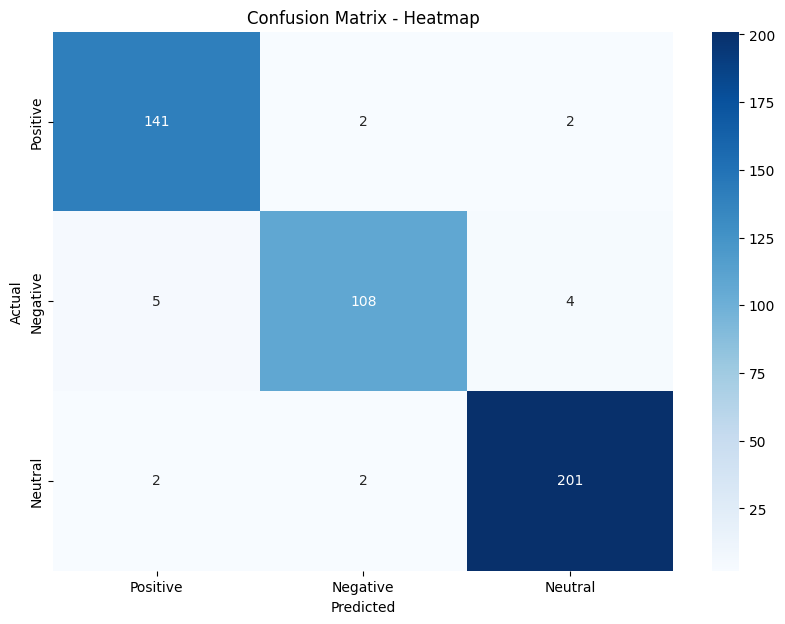

In [24]:
#Printing confusion matrix of the Support Vector Classifier model trained and tested on train data
y_pred = best_model.predict(X_train_tfidf)
# Print confusion matrix
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred, labels=[1,-1,0])
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, yticklabels=['Positive','Negative','Neutral'],xticklabels=['Positive','Negative','Neutral'] ,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Heatmap')
plt.show()

Confusion Matrix:
[[29  1  3]
 [ 4 20  6]
 [ 3  1 50]]


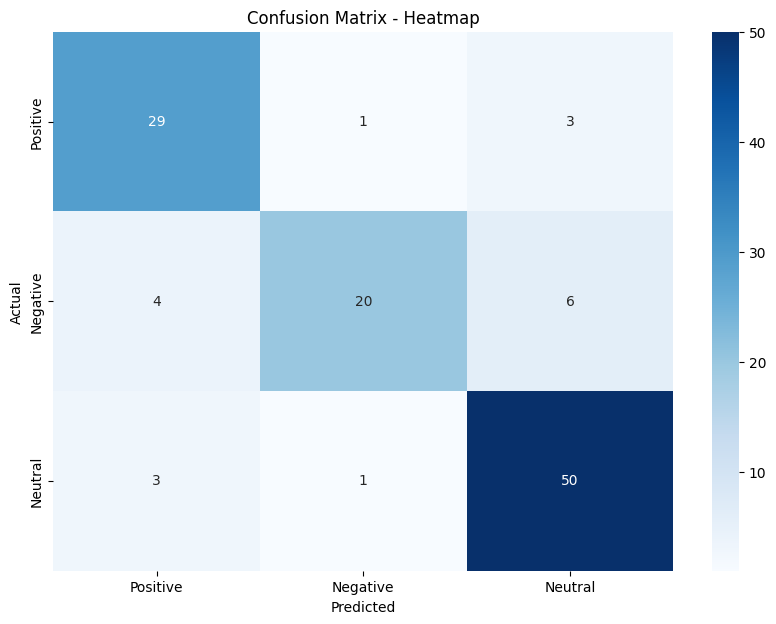

In [25]:
#Printing confusion matrix of the Support Vector Classifier model trained and tested on test data
y_pred = best_model.predict(X_test_tfidf)
# Print confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1,-1,0])
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, yticklabels=['Positive','Negative','Neutral'],xticklabels=['Positive','Negative','Neutral'] ,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Heatmap')
plt.show()